In [2]:
!pip install quandl

In [3]:
import pandas as pd
import numpy as np
import quandl, math, datetime
from  sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style 

style.use('ggplot')

df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [4]:
forecast_col= 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['Label'] = df[forecast_col].shift(-forecast_out)

X=np.array(df.drop(['Label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y=np.array(df['Label'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy, forecast_out)


[1076.22243185 1090.39284896 1104.32471148 1098.71324405 1092.25088083
 1089.70224552 1087.98263458 1084.88093293 1078.99136443 1074.72394135
 1072.23176395 1092.62720904 1110.97737498 1114.83062973 1129.63511466
 1133.6291087  1131.88247356 1129.60428287 1131.22888    1150.32995511
 1149.50925057 1158.64168121 1155.30354659 1163.11201506 1184.26065076
 1195.81513622 1190.32093631 1201.9190256  1207.10894897 1206.08170493
 1196.82428825 1201.80578743 1200.8197242  1136.20742176 1085.36188831] 0.9756279629148296 35


**The forecast_set array represents the data of Closing Price each day in the coming future for 35 days, Accuracy obtained on the testing data is 97.56%.**

In [7]:
df['Forecast']=np.nan 
last_date= df.iloc[-1].name
last_unix = last_date.timestamp()
one_day=86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [ np.nan for _ in range(len(df.columns)-1)] + [i]

print (df.tail())

#fully accurate forecasting code

            Adj. Close  HL_PCT  PCT_change  Adj. Volume  Label     Forecast
Date                                                                       
2018-04-12         NaN     NaN         NaN          NaN    NaN  1196.824288
2018-04-13         NaN     NaN         NaN          NaN    NaN  1201.805787
2018-04-14         NaN     NaN         NaN          NaN    NaN  1200.819724
2018-04-15         NaN     NaN         NaN          NaN    NaN  1136.207422
2018-04-16         NaN     NaN         NaN          NaN    NaN  1085.361888


The last 5 days of forecasted data.

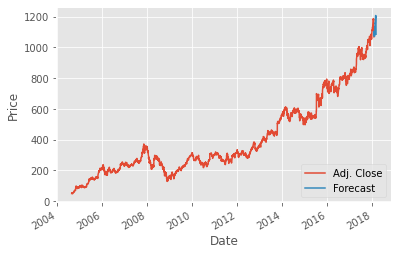

In [6]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
